In [ ]:
!nvidia-smi

Tue Sep 29 07:15:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ktrain
!pip install tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from ktrain import text

     |████████████████████████████████| 25.3MB 125kB/s 
     |████████████████████████████████| 983kB 51.7MB/s 
     |████████████████████████████████| 245kB 50.1MB/s 
     |████████████████████████████████| 1.0MB 48.4MB/s 
     |████████████████████████████████| 471kB 45.1MB/s 
     |████████████████████████████████| 3.0MB 50.1MB/s 
     |████████████████████████████████| 890kB 48.8MB/s 
     |████████████████████████████████| 1.1MB 36.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.21.4-cp36-none-any.whl size=25270024 sha256=627cc84c354e42efdf53648b9bf788175ae6400fff2705cc9cf0dff069920bae
  Stored in directory: /root/.cache/pip/wheels/e8/b6/c2/a730bb7727f9402827eb9cdd277a527a4a88acb2b0d22f06f0
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=962f1c43533f90714e790e321ba9fa3be63e57a4a413bb566a41835c72ad65b8
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
data_imdb = pd.read_csv('IMDB Dataset.csv')

In [ ]:
data_imdb.sample(10)

,review,sentiment
3555,After putting a mummy in a local museum goes t...,negative
26127,Where the Rivers Flow North is a well-told sto...,positive
44192,I drove from Sacramento to San Francisco (and ...,positive
24619,Big splashy film of the Broadway music. Nathan...,positive
31177,"When I saw this movie at age 6, it was in the ...",positive
47228,Here's a movie with a good cast and nice looki...,negative
28066,"As someone who was in a Pan-Hellenic sorority,...",positive
2212,"Four great stories from master Robert Bloch, a...",positive
37142,publicity got me to the theatre<br /><br />adv...,negative
5072,This movie is based on a Stephen King novel in...,negative


In [ ]:
data_imdb.shape

(50000, 2)

In [ ]:
data_imdb.columns

Index(['review', 'sentiment'], dtype='object')

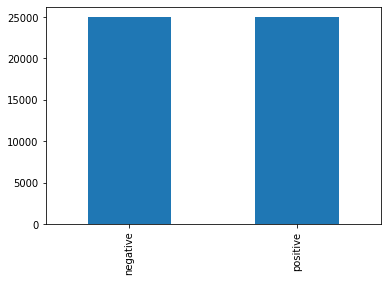

In [ ]:
data_imdb['sentiment'].value_counts().sort_index().plot.bar()

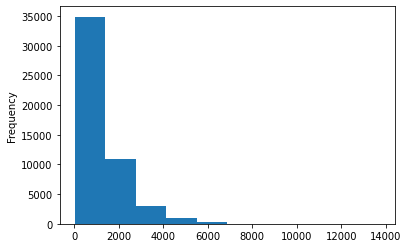

In [ ]:
data_imdb['review'].str.len().plot.hist()

# counting the number of words

In [ ]:
data_imdb['word_counts'] = data_imdb['review'].apply(lambda x: len(str(x).split()))

In [ ]:
data_imdb

,review,sentiment,word_counts
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
49995,I thought this movie did a down right good job...,positive,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112
49997,I am a Catholic taught in parochial elementary...,negative,230
49998,I'm going to have to disagree with the previou...,negative,212


In [ ]:
data_imdb['word_counts'].max()

2470

In [ ]:
data_imdb['word_counts'].min()

4

# Character count

In [ ]:
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)

In [ ]:
data_imdb['char_counts'] = data_imdb['review'].apply(lambda x: char_counts(str(x)))

In [ ]:
data_imdb['char_counts'].max()

11235

In [ ]:
data_imdb['char_counts'].min()

27

In [ ]:
data_imdb.sample(10)

,review,sentiment,word_counts,char_counts
44261,"At first glance a film like Northfork, a town ...",positive,252,1123
6035,"MARY, MARY, BLOODY MARY is an OK time killer. ...",negative,128,575
43070,Ohhhh MAN this movie is awful!!<br /><br />Thi...,negative,157,722
30545,I can just picture how this movie came to be:<...,negative,411,1806
1309,Halloween 666 (1995) The producer's cut review...,positive,229,1114
29,'War movie' is a Hollywood genre that has been...,positive,615,3177
41110,Ram Gopal Verma has proved himself as a very i...,negative,158,812
43063,Thank god ABC picked this up instead of Fox. T...,positive,125,592
3546,I've been writing hardboiled crime fiction for...,positive,122,559
32634,"""Distant"" is a slice-of-Turkish-life flick whi...",positive,124,652


# Average word length

In [ ]:
data_imdb['Average_count'] = data_imdb['char_counts']/data_imdb['word_counts']
data_imdb['Average_count']

0        4.739414
1        5.166667
2        4.584337
3        4.427536
4        4.730435
           ...   
49995    4.201031
49996    4.741071
49997    4.569565
49998    4.825472
49999    4.263566
Name: Average_count, Length: 50000, dtype: float64

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
len(stopwords)

326

In [ ]:
data_imdb['stop_words_length'] = data_imdb['review'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [ ]:
data_imdb

,review,sentiment,word_counts,char_counts,Average_count,stop_words_length
0,One of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135
1,A wonderful little production. <br /><br />The...,positive,162,837,5.166667,71
2,I thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81
3,Basically there's a family where a little boy ...,negative,138,611,4.427536,63
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1088,4.730435,107
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,815,4.201031,109
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,531,4.741071,49
49997,I am a Catholic taught in parochial elementary...,negative,230,1051,4.569565,117
49998,I'm going to have to disagree with the previou...,negative,212,1023,4.825472,105


count hashtags and mentione in the tweet


In [ ]:
data_imdb['hashtag_count'] = data_imdb['review'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
data_imdb['mention_count'] = data_imdb['review'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
data_imdb

,review,sentiment,word_counts,char_counts,Average_count,stop_words_length,hashtag_count,mention_count
0,One of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,0,0
1,A wonderful little production. <br /><br />The...,positive,162,837,5.166667,71,0,0
2,I thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,0,0
3,Basically there's a family where a little boy ...,negative,138,611,4.427536,63,0,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1088,4.730435,107,0,0
...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,815,4.201031,109,0,0
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,531,4.741071,49,0,0
49997,I am a Catholic taught in parochial elementary...,negative,230,1051,4.569565,117,0,0
49998,I'm going to have to disagree with the previou...,negative,212,1023,4.825472,105,0,0


dealing with numeric data


In [ ]:
data_imdb['numeric_counts'] = data_imdb['review'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
data_imdb

,review,sentiment,word_counts,char_counts,Average_count,stop_words_length,hashtag_count,mention_count,numeric_counts
0,One of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,0,0,1
1,A wonderful little production. <br /><br />The...,positive,162,837,5.166667,71,0,0,0
2,I thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,0,0,0
3,Basically there's a family where a little boy ...,negative,138,611,4.427536,63,0,0,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1088,4.730435,107,0,0,0
...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,815,4.201031,109,0,0,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,531,4.741071,49,0,0,0
49997,I am a Catholic taught in parochial elementary...,negative,230,1051,4.569565,117,0,0,0
49998,I'm going to have to disagree with the previou...,negative,212,1023,4.825472,105,0,0,1


upper case word count

In [ ]:
data_imdb['upper_case_counts'] = data_imdb['review'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
data_imdb

,review,sentiment,word_counts,char_counts,Average_count,stop_words_length,hashtag_count,mention_count,numeric_counts,upper_case_counts
0,One of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,0,0,1,8
1,A wonderful little production. <br /><br />The...,positive,162,837,5.166667,71,0,0,0,2
2,I thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,0,0,0,3
3,Basically there's a family where a little boy ...,negative,138,611,4.427536,63,0,0,1,3
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1088,4.730435,107,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,815,4.201031,109,0,0,1,3
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,531,4.741071,49,0,0,0,3
49997,I am a Catholic taught in parochial elementary...,negative,230,1051,4.569565,117,0,0,0,5
49998,I'm going to have to disagree with the previou...,negative,212,1023,4.825472,105,0,0,1,0


lower case conversion

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: str(x).lower())

contraction to expansion

In [ ]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for keys in contractions:
      value = contractions[keys]
      x = x.replace(keys, value)
    return x
  else:
    return x

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: cont_to_exp(x))

In [ ]:
data_imdb['review'].str.contains('.com')

0         True
1         True
2         True
3         True
4         True
         ...  
49995     True
49996    False
49997     True
49998     True
49999    False
Name: review, Length: 50000, dtype: bool

In [ ]:
import re
data_imdb['emails'] = data_imdb['review'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',x))
data_imdb['emails_count'] = data_imdb['emails'].apply(lambda x: len(x))

In [ ]:
data_imdb

,review,sentiment,word_counts,char_counts,Average_count,stop_words_length,hashtag_count,mention_count,numeric_counts,upper_case_counts,emails,emails_count
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,0,0,1,8,[],0
1,a wonderful little production. <br /><br />the...,positive,162,837,5.166667,71,0,0,0,2,[],0
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,0,0,0,3,[],0
3,basically there has / there is a family where ...,negative,138,611,4.427536,63,0,0,1,3,[],0
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,107,0,0,0,1,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,194,815,4.201031,109,0,0,1,3,[],0
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,112,531,4.741071,49,0,0,0,3,[],0
49997,i am a catholic taught in parochial elementary...,negative,230,1051,4.569565,117,0,0,0,5,[],0
49998,i'm going to have to disagree with the previou...,negative,212,1023,4.825472,105,0,0,1,0,[],0


In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',"",x))

count urls and remove them

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

special characters and punctuation removal

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: re.sub(r'[^\w ]+',"",x))

remove the multiple spaces

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: ' '.join(x.split()))

remove the HTMl tage from the data

In [ ]:
from bs4 import BeautifulSoup
data_imdb['review'] = data_imdb['review'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

remove the accented chars

In [ ]:
import unicodedata
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf8', 'ignore')
  return x

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: remove_accented_chars(x))

remove the stop words

In [ ]:
data_imdb['review_no_stop'] = data_imdb['review'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

convert into base or roots form of a word which is lemmatization

In [ ]:
data_imdb

,review,sentiment,word_counts,char_counts,Average_count,stop_words_length,hashtag_count,mention_count,numeric_counts,upper_case_counts,emails,emails_count,review_no_stop
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,0,0,1,8,[],0,reviewers mentioned watching 1 oz episode shal...
1,a wonderful little production br br the filmin...,positive,162,837,5.166667,71,0,0,0,2,[],0,wonderful little production br br filming tech...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,0,0,0,3,[],0,thought wonderful way spend time hot summer we...
3,basically there has there is a family where a ...,negative,138,611,4.427536,63,0,0,1,3,[],0,basically family little boy jake thinks zombie...
4,petter matteis love in the time of money is a ...,positive,230,1088,4.730435,107,0,0,0,1,[],0,petter matteis love time money visually stunni...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,194,815,4.201031,109,0,0,1,3,[],0,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,112,531,4.741071,49,0,0,0,3,[],0,bad plot bad dialogue bad acting idiotic direc...
49997,i am a catholic taught in parochial elementary...,negative,230,1051,4.569565,117,0,0,0,5,[],0,catholic taught parochial elementary schools n...
49998,im going to have to disagree with the previous...,negative,212,1023,4.825472,105,0,0,1,0,[],0,im going disagree previous comment maltin seco...


word cloud visualisation

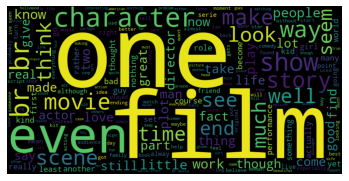

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
text = ' '.join(data_imdb['review'])
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

also for better final check.


In [ ]:
!pip install spacy==2.2.3

!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

     |████████████████████████████████| 10.4MB 4.7MB/s 
     |████████████████████████████████| 2.2MB 56.9MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


     |████████████████████████████████| 122kB 5.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-buafbo4i
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-buafbo4i
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.0-cp36-none-any.whl size=11716 sha256=7aa201b10e51c1b48e1f619d3177ac21651a6362be6cc763c1051c3ae011d6ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-iswmfx7h/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
data_imdb['review'] = data_imdb['review'].apply(lambda x: get_clean(x))

In [ ]:
data_imdb

,review,sentiment,word_counts,char_counts,Average_count,stop_words_length,hashtag_count,mention_count,numeric_counts,upper_case_counts,emails,emails_count,review_no_stop
0,one of the other revthat iswers has mentioned ...,positive,307,1455,4.739414,135,0,0,1,8,[],0,reviewers mentioned watching 1 oz episode shal...
1,a wonderfyoul little prodyouction br br the fi...,positive,162,837,5.166667,71,0,0,0,2,[],0,wonderful little production br br filming tech...
2,i thoyoughyougheight this was a wonderfyoul wa...,positive,166,761,4.584337,81,0,0,0,3,[],0,thought wonderful way spend time hot summer we...
3,basi seeally there has there is a fami love yo...,negative,138,611,4.427536,63,0,0,1,3,[],0,basically family little boy jake thinks zombie...
4,petter matteis love in the time of money is a ...,positive,230,1088,4.730435,107,0,0,0,1,[],0,petter matteis love time money visually stunni...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i thoyoughyougheight this movthat is did a dow...,positive,194,815,4.201031,109,0,0,1,3,[],0,thought movie right good job creative original...
49996,bad plot bad dialoriginalyoue bad acting idiot...,negative,112,531,4.741071,49,0,0,0,3,[],0,bad plot bad dialogue bad acting idiotic direc...
49997,i am a cathoyoughli see tayougheight in parori...,negative,230,1051,4.569565,117,0,0,0,5,[],0,catholic taught parochial elementary schools n...
49998,im get over itng to have to thisagree with the...,negative,212,1023,4.825472,105,0,0,1,0,[],0,im going disagree previous comment maltin seco...


In [ ]:
data_train = data_imdb.iloc[0:25000,0:2]

In [ ]:
data_train

,review,sentiment
0,one of the other revthat iswers has mentioned ...,positive
1,a wonderfyoul little prodyouction br br the fi...,positive
2,i thoyoughyougheight this was a wonderfyoul wa...,positive
3,basi seeally there has there is a fami love yo...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
24995,this movthat is was a real toretweetyoure fest...,negative
24996,john wayne apoyounderetweet dekker compete for...,negative
24997,tarantino once remarked on a melodrama from th...,positive
24998,aah yes the workoyout show was a great not onl...,positive


In [ ]:
data_test = data_imdb.iloc[25000:,0:2]

In [ ]:
data_test

,review,sentiment
25000,this movthat is was bad from the staretweet th...,negative
25001,god i never felt so insyoulted in my whole lif...,negative
25002,not being a fan of the coen brothers or george...,positive
25003,the movthat is andaz apna apna in my books is ...,positive
25004,i have to say i was really looking forward on ...,negative
...,...,...
49995,i thoyoughyougheight this movthat is did a dow...,positive
49996,bad plot bad dialoriginalyoue bad acting idiot...,negative
49997,i am a cathoyoughli see tayougheight in parori...,negative
49998,im get over itng to have to thisagree with the...,negative


In [ ]:
#dimension of the dataset

print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

Size of train dataset:  (25000, 2)
Size of test dataset:  (25000, 2)


In [ ]:
#printing last rows of train dataset

data_train.tail()

,review,sentiment
24995,this movthat is was a real toretweetyoure fest...,negative
24996,john wayne apoyounderetweet dekker compete for...,negative
24997,tarantino once remarked on a melodrama from th...,positive
24998,aah yes the workoyout show was a great not onl...,positive
24999,this film shoyould have never been made honest...,negative


In [ ]:
#printing head rows of test dataset

data_test.head()

,review,sentiment
25000,this movthat is was bad from the staretweet th...,negative
25001,god i never felt so insyoulted in my whole lif...,negative
25002,not being a fan of the coen brothers or george...,positive
25003,the movthat is andaz apna apna in my books is ...,positive
25004,i have to say i was really looking forward on ...,negative


In [ ]:
#Splitting data into test and train set
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting truncated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering BERT model)

from ktrain import text
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'review',
                                                                   label_columns = 'sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


Observation:

You can able to see that it is detecting language as an English
Also, this is not a multilabel classification

In [ ]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500

learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)



begin training using onecycle policy with max lr of 2e-05...
   5/4167 [..............................] - ETA: 55:57 - loss: 0.0969 - accuracy: 0.9667

KeyboardInterrupt: ignored

85.68% accuracy in a single epoch.

Let's make some predictions on new data

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
         'The film really sucked. I want my money back.',
        'The plot had too many holes.',
        'What a beautiful romantic comedy. 10/10 would see again!',
         ]

In [ ]:
predictor.predict(data)

['negative', 'negative', 'negative', 'positive']

In [ ]:
predictor.predict(data, return_proba=True)

array([[0.9845158 , 0.01548417],
       [0.94102114, 0.05897887],
       [0.9775333 , 0.02246678],
       [0.00207008, 0.99792993]], dtype=float32)

In [ ]:
#classes available

predictor.get_classes()

['negative', 'positive']

In [ ]:
# saving model and weights

predictor.save('/content/drive/My Drive/bert')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')